In [1]:
# Import a python file
import mystoi_for_viz as mystoi

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Audio files to import
spin_file_path = r"C:\Users\George\Desktop\Automatic Control and Robotics\Semester 7\Thesis\Datasets and other Downloads\clarity_CPC1_data.test.v1\clarity_CPC1_data\clarity_data\HA_outputs\test\S08520_L0216_E001.wav"
target_file_path = r"C:\Users\George\Desktop\Automatic Control and Robotics\Semester 7\Thesis\Datasets and other Downloads\clarity_CPC1_data.test.v1\clarity_CPC1_data\clarity_data\scenes\S08520_target_anechoic.wav"

In [4]:
import soundfile as sf
# Opening audio files using soundfile
spin, spin_sr = sf.read(spin_file_path)
target, target_sr = sf.read(target_file_path)

new_sr = 10000

In [5]:
# Check lengths of both audios
print(spin.shape, target.shape)

# Remove first 2 seconds and last 1 second of both audios
spin = spin[2*spin_sr:-spin_sr]
target = target[2*target_sr:-target_sr]

# Check shapes of both audios
print(spin.shape, target.shape)

(168641, 2) (232407, 2)
(72641, 2) (100107, 2)


In [6]:
from scipy.signal import resample

spin_resampled = resample(spin, int(len(spin) * new_sr / spin_sr))   # NOTE - current_no_of_samples / current_sampling_rate is the duration of audio signal
target_resampled = resample(target, int(len(target) * new_sr / target_sr))

In [7]:
# Check shapes of both audios
print(spin_resampled.shape, target_resampled.shape)

(22700, 2) (22700, 2)


In [8]:
# Convert to mono
if len(spin_resampled.shape) == 2:
    spin_mono = spin_resampled.mean(axis=1)
    spin_resampled_mono = spin_resampled.mean(axis=1)
else:
    raise Exception("SPIN audio is not stereo.")
if len(target_resampled.shape) == 2:
    target_mono = target_resampled.mean(axis=1)
    target_resampled_mono = target_resampled.mean(axis=1)
else:
    raise Exception("Target audio is not stereo.")

In [9]:
# Check shapes of both audios
print(spin_resampled_mono.shape, target_resampled_mono.shape)

(22700,) (22700,)


## Plot Signals After Resampling and Mono Conversion

(22700,) (22700,)


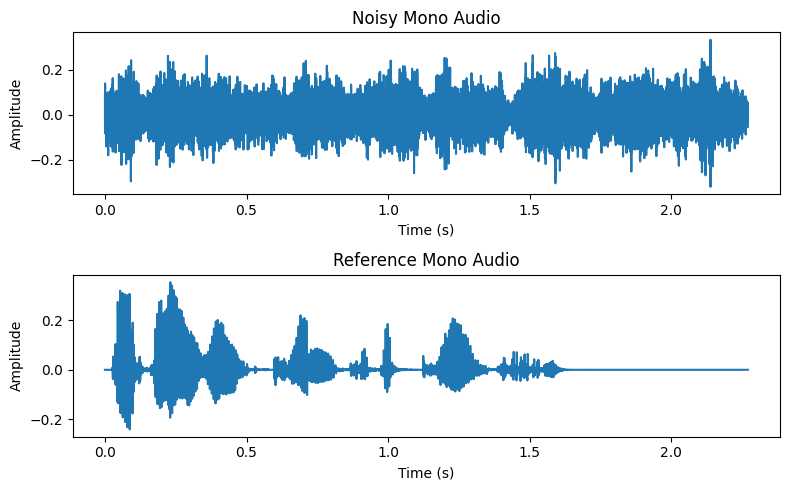

In [10]:
# Make time axis
time = np.linspace(0, len(spin_resampled_mono) / new_sr, len(spin_resampled_mono))

# Check shapes of both audios
print(spin_resampled_mono.shape, target_resampled_mono.shape)

# Plot the resampled audio signals as subfigures top and bottom
plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
plt.plot(time, spin_resampled_mono)
plt.title('Noisy Mono Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(time, target_resampled_mono)
plt.title('Reference Mono Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
# save the plot as svg
plt.savefig('audio_signals.svg')
plt.show()

## Plot signals after silent frame removal

(14720,) (14720,)


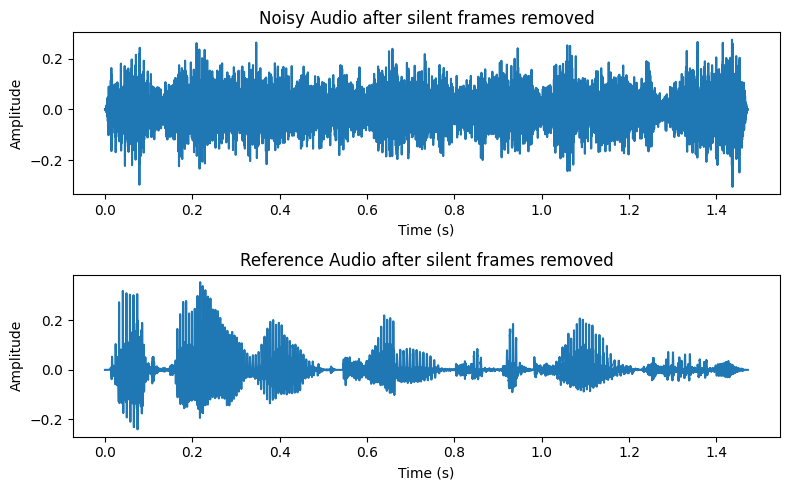

In [11]:
# Make compute_stoi return the signals after silent frames are removed
target_sfr, spin_sfr = mystoi.compute_stoi(target_resampled_mono, spin_resampled_mono, new_sr, return_sfr=True)

# print shapes
print(spin_sfr.shape, target_sfr.shape)

# make time axis for the signals after silent frames are removed
time = np.linspace(0, len(spin_sfr) / new_sr, len(spin_sfr))

# Plot the signals after silent frames are removed
plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
plt.plot(time, spin_sfr)
plt.title('Noisy Audio after silent frames removed')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(time, target_sfr)
plt.title('Reference Audio after silent frames removed')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
# save the plot as svg
plt.savefig('audio_sfr_signals.svg')
plt.show()

## Plot signals after STFT

(257, 116) (257, 116)


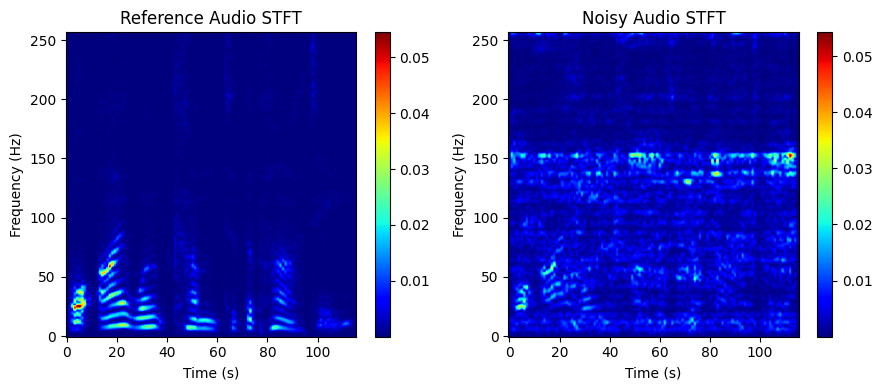

In [12]:
# Get the STFT of the signals from compute_stoi
clean_stft, spin_stft = mystoi.compute_stoi(target_resampled_mono, spin_resampled_mono, new_sr, return_stft=True)

# print shapes
print(clean_stft.shape, spin_stft.shape)

# Plot the STFT of the signals
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(clean_stft), aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
plt.title('Reference Audio STFT')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.subplot(1, 2, 2)
plt.imshow(np.abs(spin_stft), aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
plt.title('Noisy Audio STFT')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
# save the plot as svg
plt.savefig('STFT.svg')
plt.show()

## Plot signals after Octave Band Analysis

Shape of clean_tf_bins:  (15, 116)
Shape of spin_tf_bins:  (15, 116)


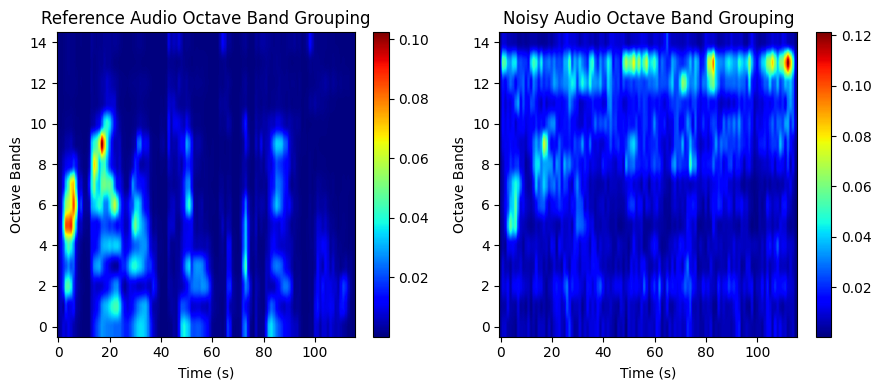

In [13]:
# Get the octave band STFT of the signals from compute_stoi
clean_tf_bins, spin_tf_bins = mystoi.compute_stoi(target_resampled_mono, spin_resampled_mono, new_sr, return_octave_stft=True)

print("Shape of clean_tf_bins: ", clean_tf_bins.shape)
print("Shape of spin_tf_bins: ", spin_tf_bins.shape)

# Plot the octave band STFT of the signals
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(clean_tf_bins), aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
plt.title('Reference Audio Octave Band Grouping')
plt.xlabel('Time (s)')
plt.ylabel('Octave Bands')
plt.subplot(1, 2, 2)
plt.imshow(np.abs(spin_tf_bins), aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
plt.title('Noisy Audio Octave Band Grouping')
plt.xlabel('Time (s)')
plt.ylabel('Octave Bands')
plt.tight_layout()
# save the plot as svg
plt.savefig("octave_band_grouping.svg")
plt.show()

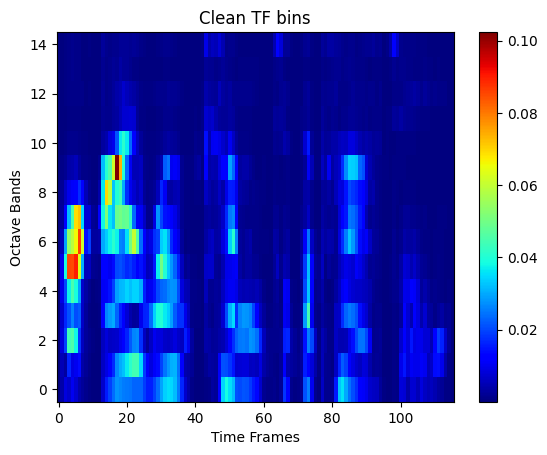

In [14]:
plt.imshow(clean_tf_bins, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
plt.title("Clean TF bins")
plt.xlabel("Time Frames")
plt.ylabel("Octave Bands")
plt.show()

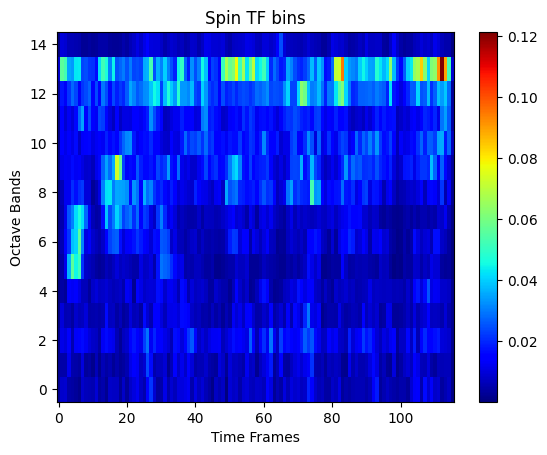

In [15]:
plt.imshow(spin_tf_bins, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
plt.xlabel("Time Frames")
plt.ylabel("Octave Bands")
plt.title("Spin TF bins")
plt.show()

---

---

Before removing first 2 seconds and last 1 second:
```
Shape of dmatrix:  (384, 15, 30)
Shape of clean_tf_bins:  (15, 413)
Shape of spin_tf_bins:  (15, 413)
```

After removing first 2 seconds and last 1 second:
```
Shape of dmatrix:  (150, 15, 30)
Shape of clean_tf_bins:  (15, 179)
Shape of spin_tf_bins:  (15, 179)
```

---

In [16]:
# # Reduce the 3d matrix to 2d matrix by averaging over the time axis
# dmatrix_2d = dmatrix_3d.sum(axis=2) /dmatrix_3d.shape[1]
# print("Shape of dmatrix 2d: ", dmatrix_2d.shape)

In [17]:
# # Checking how to make shapes same
# frame_length = 30
# half_frame_length = frame_length // 2

# # Transpose dmatrix_2d to have time axis as the first axis
# dmatrix_2d = dmatrix_2d.T

# print("frame_length: ", frame_length)
# print("half_frame_length: ", half_frame_length)
# print("Shape of dmatrix 2d: ", dmatrix_2d.shape)
# print("Shape of clean_tf_bins: ", clean_tf_bins[:, half_frame_length:-half_frame_length+1].shape)
# print("Shape of spin_tf_bins: ", clean_tf_bins[:, half_frame_length:-half_frame_length+1].shape)

In [18]:
# # Remove half frame length from the tf_bins from both ends of 2nd axis
# clean_tf_bins = clean_tf_bins[:, half_frame_length:-half_frame_length+1]
# spin_tf_bins = spin_tf_bins[:, half_frame_length:-half_frame_length+1]

# print("Shape of dmatrix 2d: ", dmatrix_2d.shape)
# print("Shape of clean_tf_bins: ", clean_tf_bins.shape)
# print("Shape of spin_tf_bins: ", spin_tf_bins.shape)

## Visualize the tf bins